In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils

from datetime import datetime

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [46]:
import importlib
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:441: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:443: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:448: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:450: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py'>

## Calibraton pulses

Though this dataset has 12 e but later found that there are actually 14 e.

In [29]:
def get_pulse_area(data_files):
    tt, dd, aa = [], [], []
    for file in data_files:
        data = np.genfromtxt(file, delimiter=',', skip_header=2).T
        tt.append(data[0])  # time in us
        dd.append(data[3])  # V

        noise = np.mean(data[3][data[3]>0.005])
        area = np.trapz(data[3]-noise, data[0]*1e-6)
        aa.append(np.abs(area))

    tt = np.asarray(tt)
    dd = np.asarray(dd)
    aa = np.asarray(aa)
    
    return tt, dd, aa

In [30]:
folder = r'/Volumes/LaCie/pulse_waveform/20241112'

tts, dds, aas = [], [], []
for dataset in ['1v', '3v', '5v', '7v', '9v']:
    combined_path = os.path.join(folder, dataset, '*/*.csv')
    data_files = sorted(glob.glob(combined_path))

    tt, dd, aa = get_pulse_area(data_files)
    
    tts.append(tt)
    dds.append(dd)
    aas.append(aa)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_13031/4211255768.py:14: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_13031/4211255768.py:14: SyntaxWarning: invalid escape sequence '\p'
  axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)


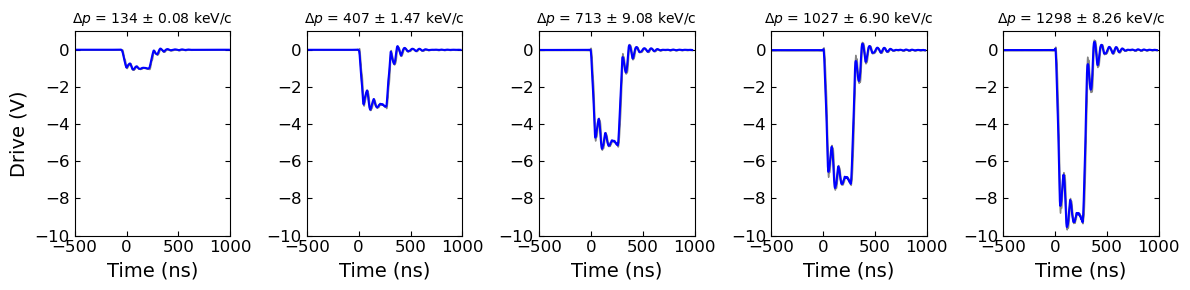

In [72]:
charge = 14
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    
    mean = np.mean(dds[i], axis=0)
    std = np.std(dds[i], axis=0)
    
    amp_kev = charge * np.mean(aas[i]) * 120 * 1.602e-19 * utils.SI2ev / 1000
    amp_kev_std = charge * np.std(aas[i]) * 120 * 1.602e-19 * utils.SI2ev / 1000
    
    axes[i].fill_between(tts[i][0]*1000, mean-std, mean+std, color='grey', alpha=0.95)
    axes[i].plot(tts[i][0]*1000, mean, color='blue')
    
    axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)

    axes[i].set_xlim(-500, 1000)
    axes[i].set_ylim(-10, 1)
    
    if i == 0:
        axes[i].set_ylabel('Drive (V)')

    axes[i].set_xlabel('Time (ns)')

fig.tight_layout()

## Calibration

In [ ]:
folder = r'/Volumes/LaCie/pulse_calibration/20241113_14e'
datasets = ['20241113_dg_12e_1v', '20241113_dg_12e_3v', '20241113_dg_12e_5v', '20241113_dg_12e_7v', '20241113_dg_12e_9v']
pulseamps = np.asarray([134, 407, 713, 1027, 1298])

unnormalized_amps = utils.get_all_unnormalized_amps(folder, datasets, pulseamps, False)

20241113_dg_12e_1v
20241113_dg_12e_3v
20241113_dg_12e_5v
20241113_dg_12e_7v
20241113_dg_12e_9v


In [74]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]
hhs, bcs, gps = utils.fit_amps_gaus(unnormalized_amps)

amp2kevs = [(pulseamps[i] / gps[i][1]) for i in range(len(pulseamps))]
# Take the average of 700 and 900 kev cases
amp2kev = np.mean(np.asarray(amp2kevs[-1:]))

normalized_amps = [amp * amp2kev for amp in unnormalized_amps]

(0.0, 2500.0)

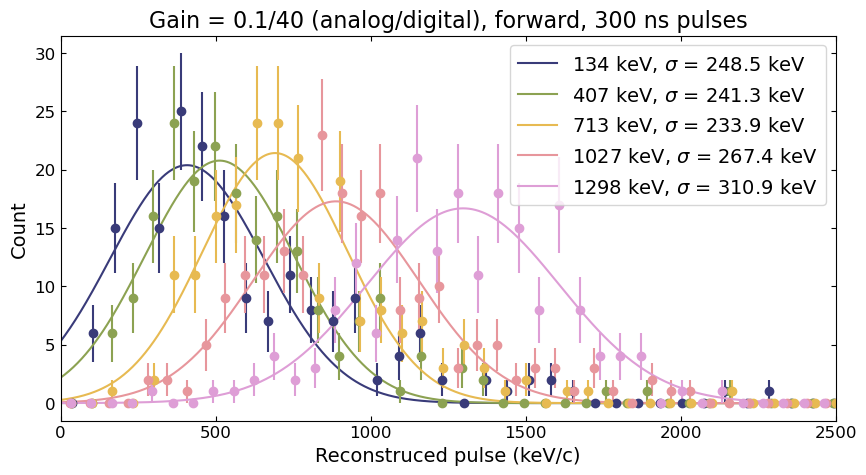

In [75]:
fig, ax = utils.plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, amp2kev=amp2kev, title='Gain = 0.1/40 (analog/digital), forward, 300 ns pulses')
ax.set_xlim(0, 2500)

In [76]:
print(f'Amplitude to keV converstion factor: {amp2kev}')

Amplitude to keV converstion factor: 10990.988342067423


## 1-hour NEG-only data

In [3]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241113_14e_negonly_3e-8mbar_1h'
data_prefix = r'20241113_d_12e_3e-8mbar_'

bc_0, hhs_0, good_dets_0, temps_0 = utils.load_histograms(data_dir, data_prefix, 60)
no_excess_events_0 = utils.check_excess_event(hhs_0, bc_0, thr=1500)

hh_all_sum_0 = np.sum(np.sum(hhs_0, axis=0), axis=0)
hh_cut_det_0 = hhs_0[good_dets_0]
hh_cut_all_0 = hhs_0[np.logical_and(good_dets_0, no_excess_events_0)]

hh_cut_det_sum_0 = np.sum(hh_cut_det_0, axis=0)
hh_cut_all_sum_0 = np.sum(hh_cut_all_0, axis=0)

Text(0.5, 1.0, '14e sphere data (1.0 hours), begins 2024-11-13 12:20:52.532408')

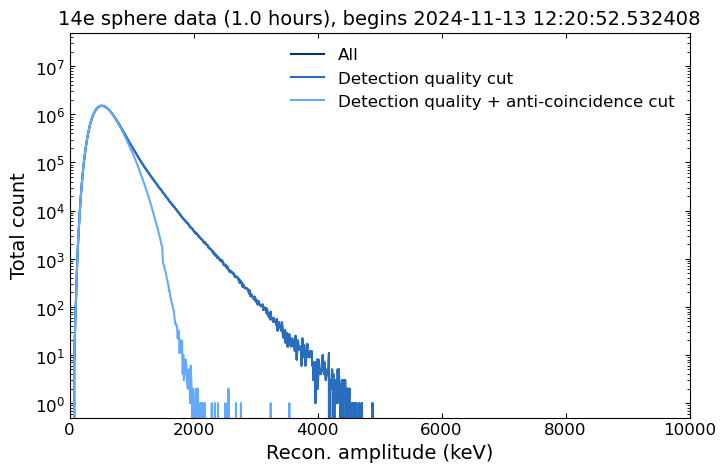

In [14]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_0, hh_all_sum_0, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_0, hh_cut_det_sum_0, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_0, hh_cut_all_sum_0, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'14e sphere data ({60/60:.1f} hours), begins {start_time}')

In [7]:
events_after_cut_0 = utils.get_events_after_cut(hhs_0, bc_0, good_dets_0, no_excess_events_0, thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_0))

Number of windows with large events (> 2000 keV):  24


/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_10.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_10.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_14.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_19.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_21.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_22.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_24.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_28.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_31.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_32.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_34.hdf5
/Volumes/LaCie/dm_data/20241113_

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:577: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 4, figsize=(12, 3))


/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_54.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_55.hdf5
/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_58.hdf5


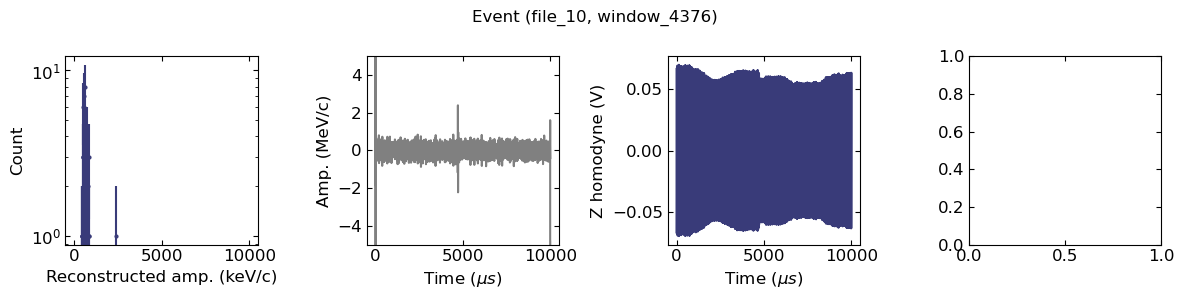

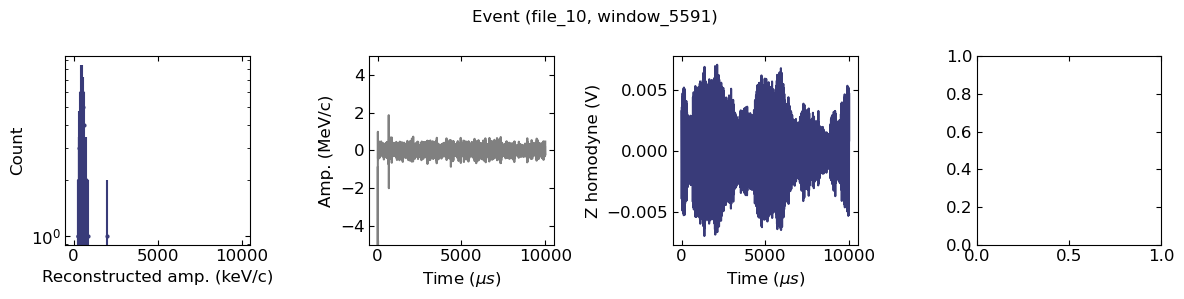

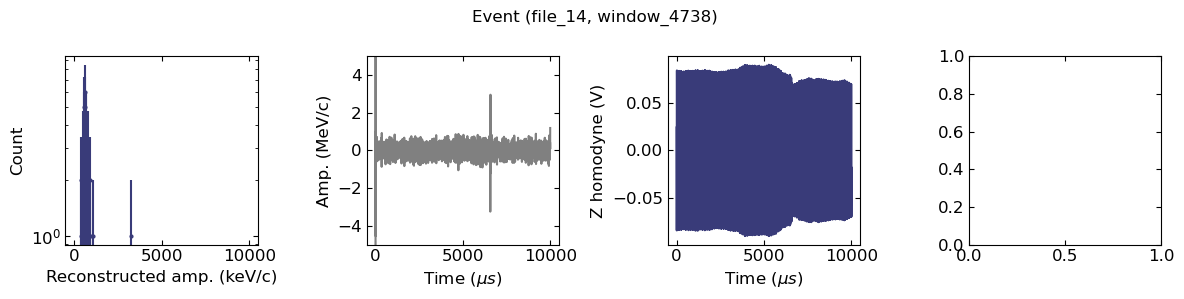

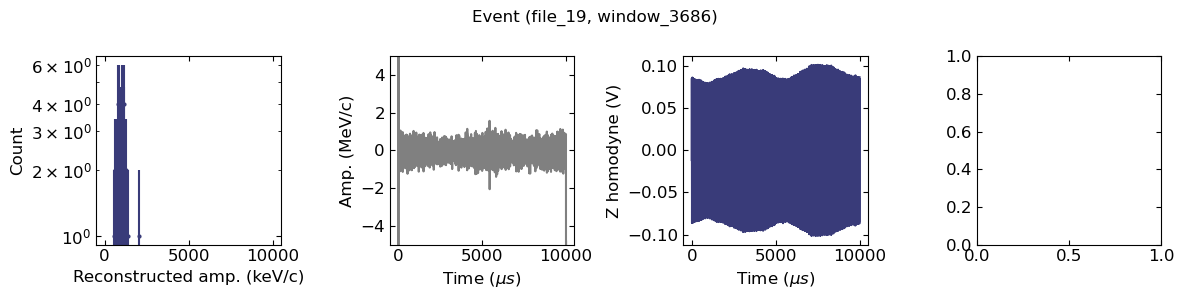

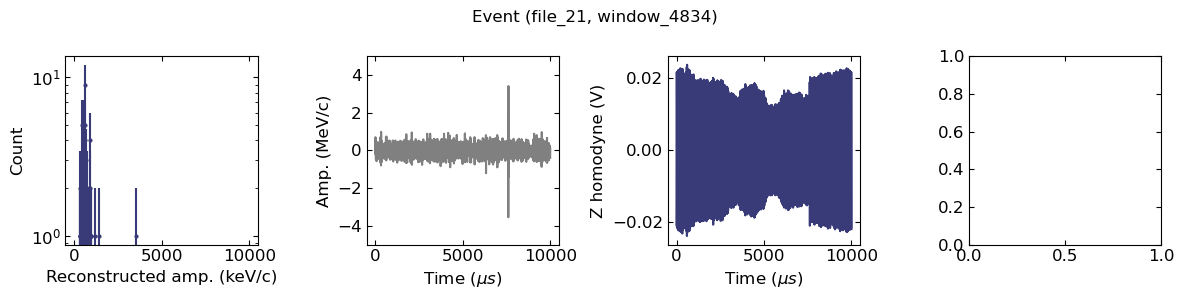

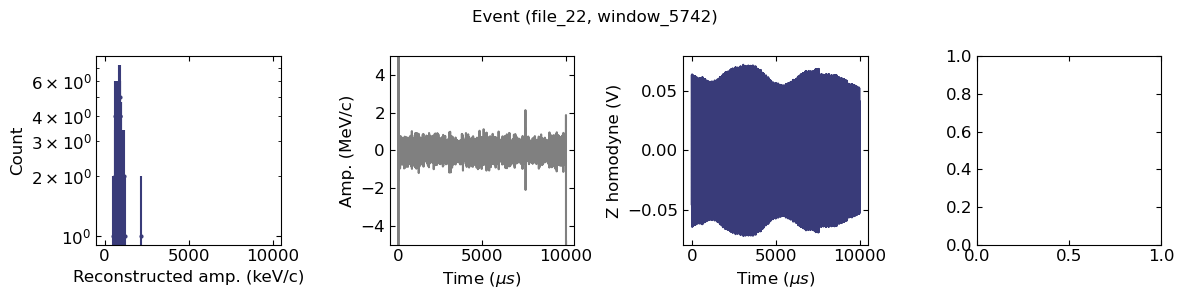

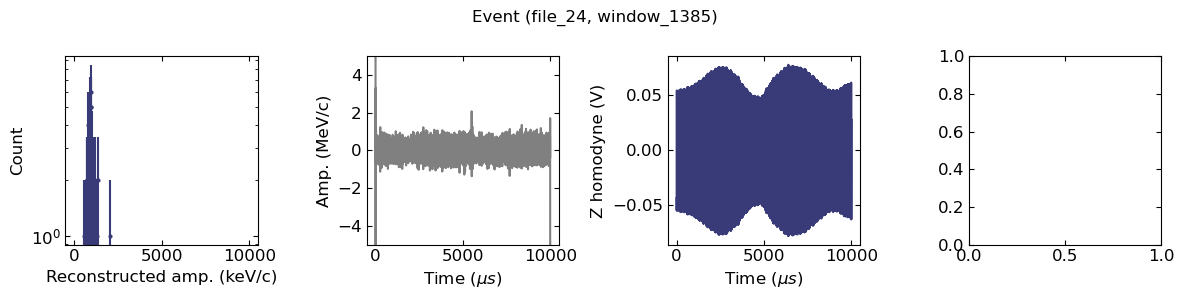

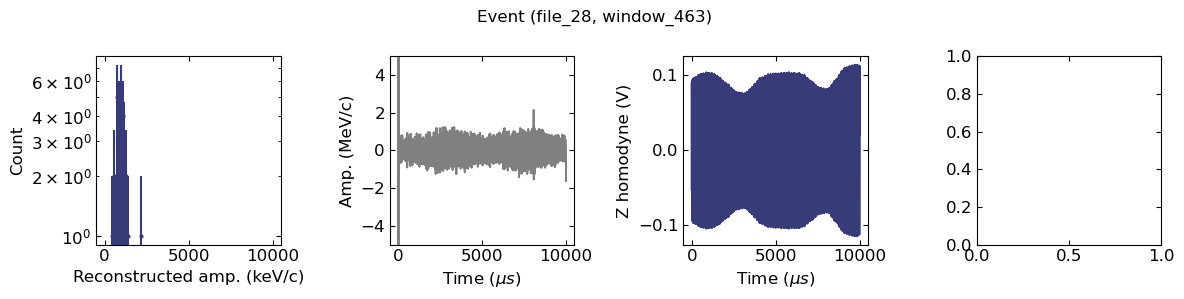

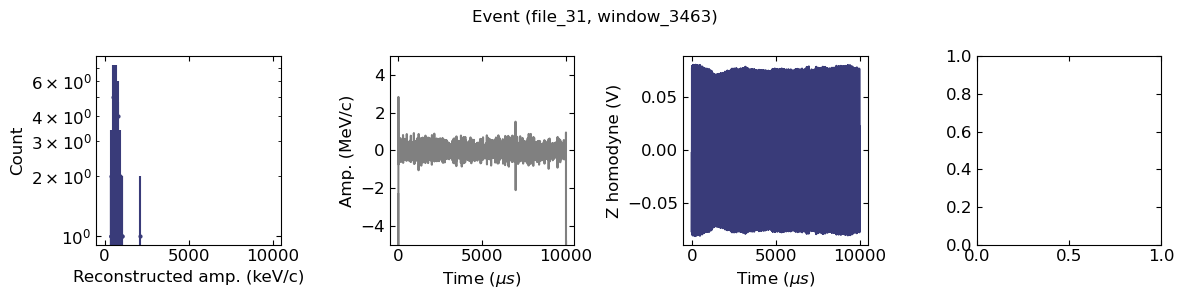

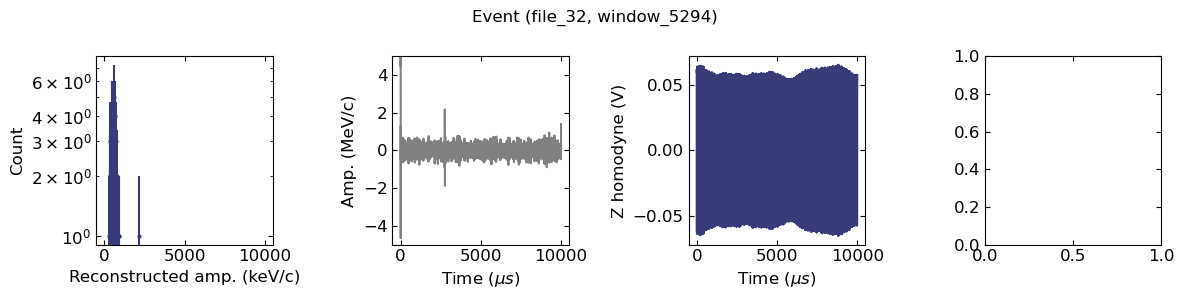

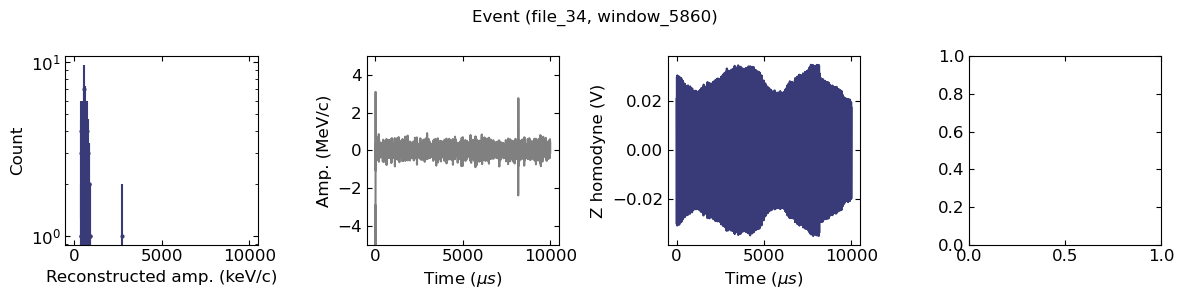

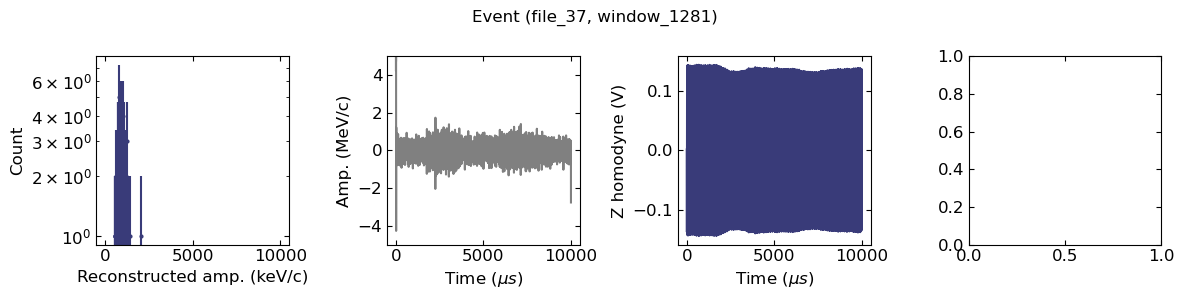

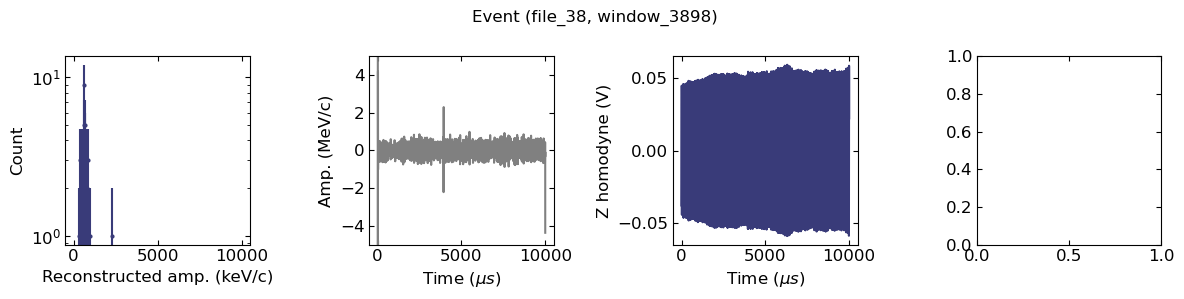

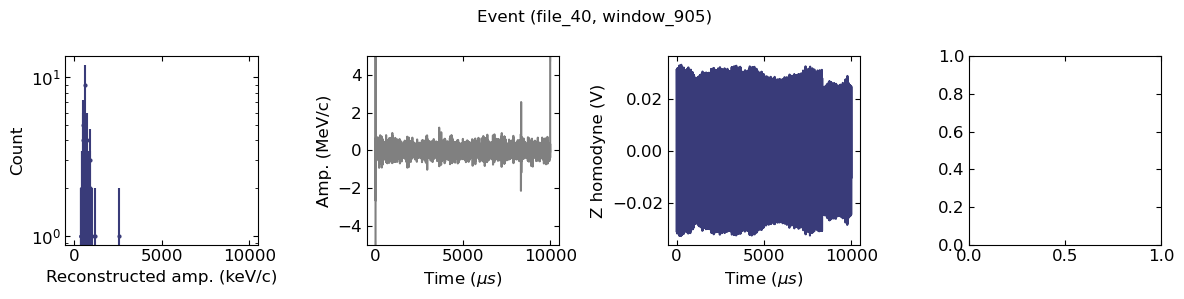

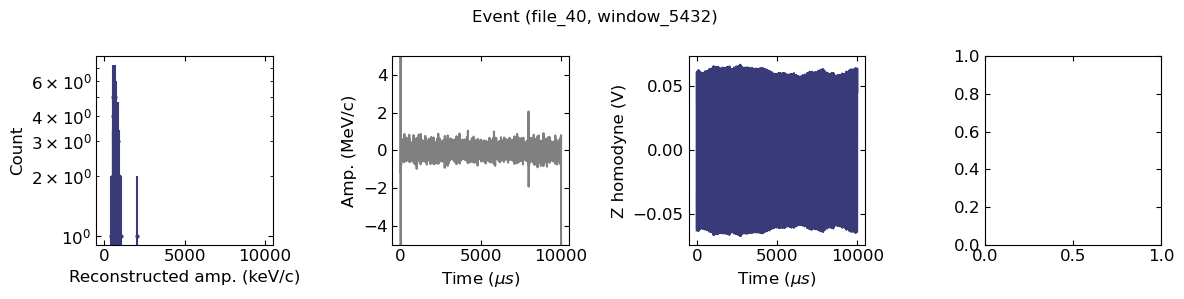

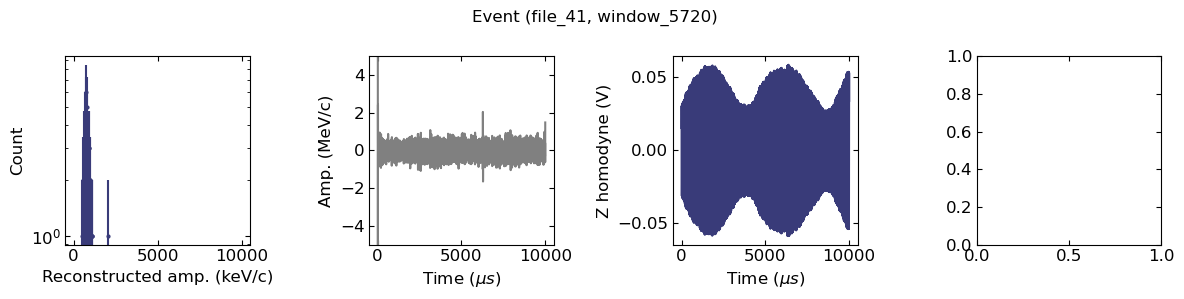

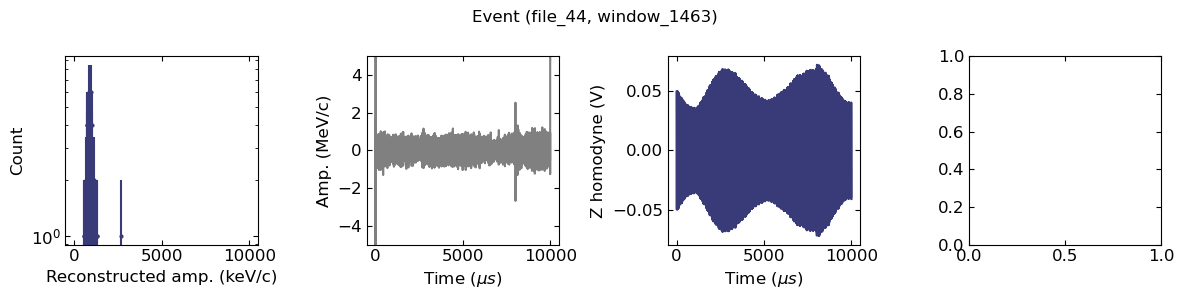

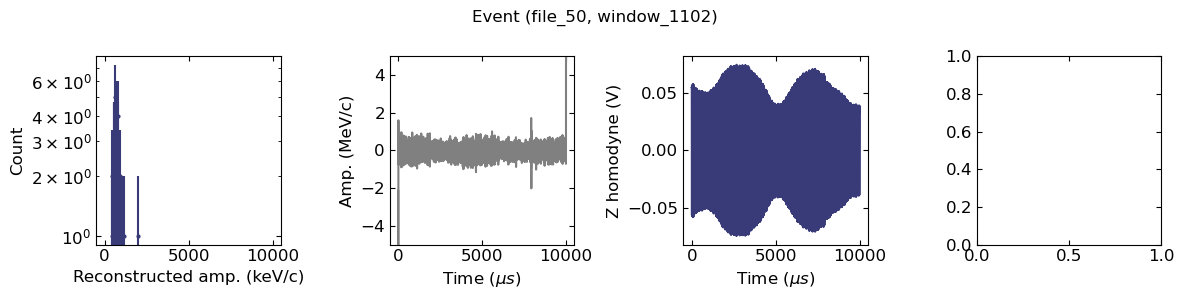

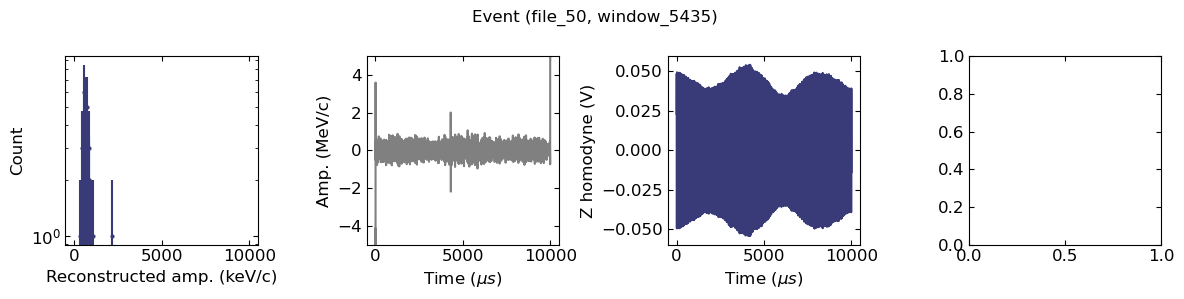

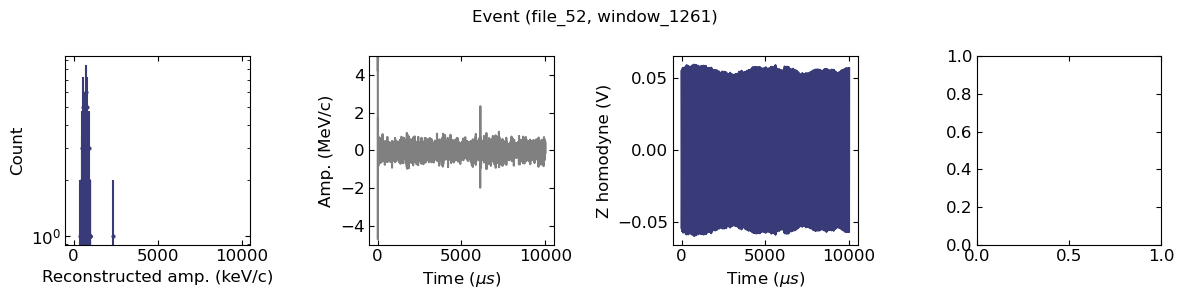

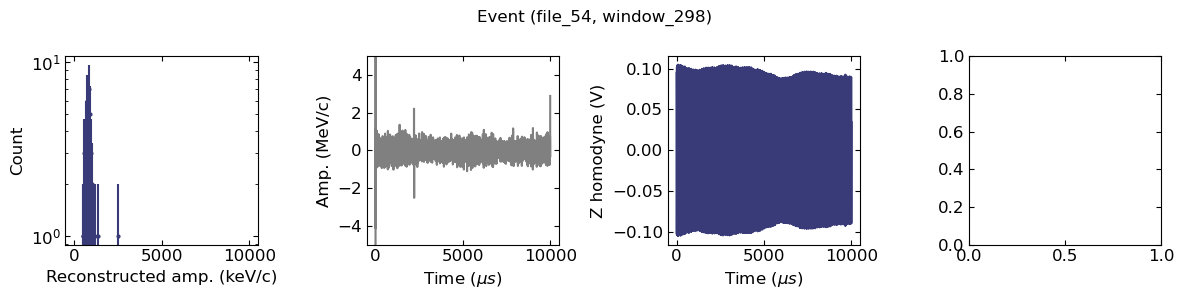

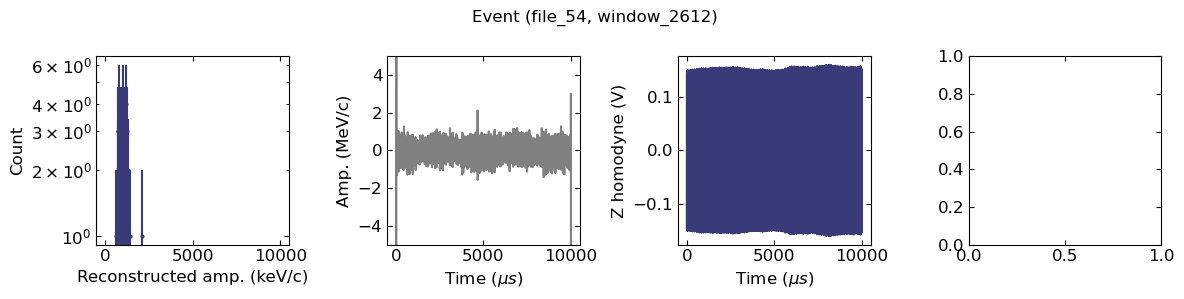

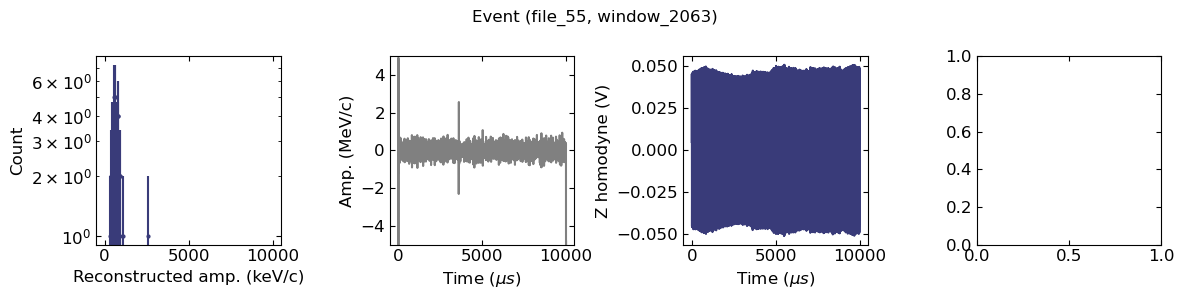

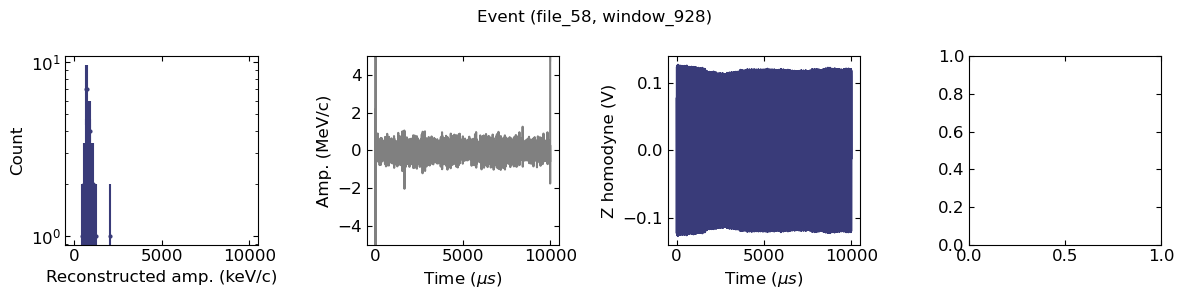

In [10]:
c_mv = 5.522e-08
amp2kev = 10990.988342067423

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_0:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

/Volumes/LaCie/dm_data/20241113_14e_negonly_3e-8mbar_1h/20241113_d_12e_3e-8mbar_14.hdf5


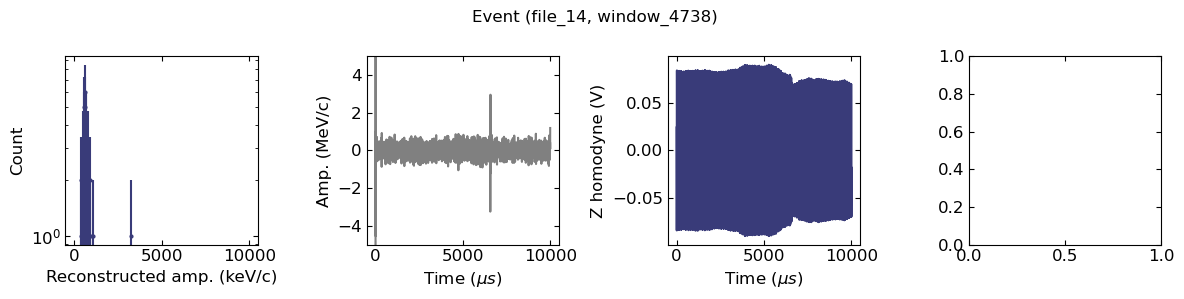

In [11]:
i, j = 14, 4738
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

(-5000.0, 5000.0)

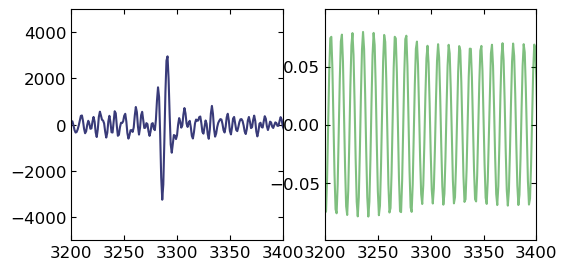

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)

for ax in axes:
    ax.set_xlim(3200, 3400)

axes[0].set_ylim(-5000, 5000)

## 1-hour neutral NEG-only data

In [18]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241113_0e_biased_negonly_3e-8mbar_1h'
data_prefix = r'20241113_d_0e_biased_3e-8mbar_'

bc_1, hhs_1, good_dets_1, temps_1 = utils.load_histograms(data_dir, data_prefix, 60)
no_excess_events_1 = utils.check_excess_event(hhs_1, bc_1, thr=1500)

hh_all_sum_1 = np.sum(np.sum(hhs_1, axis=0), axis=0)
hh_cut_det_1 = hhs_1[good_dets_1]
hh_cut_all_1 = hhs_1[np.logical_and(good_dets_1, no_excess_events_1)]

hh_cut_det_sum_1 = np.sum(hh_cut_det_1, axis=0)
hh_cut_all_sum_1 = np.sum(hh_cut_all_1, axis=0)

Text(0.5, 1.0, '0e sphere data (1.0 hours), begins 2024-11-13 17:03:49.640538')

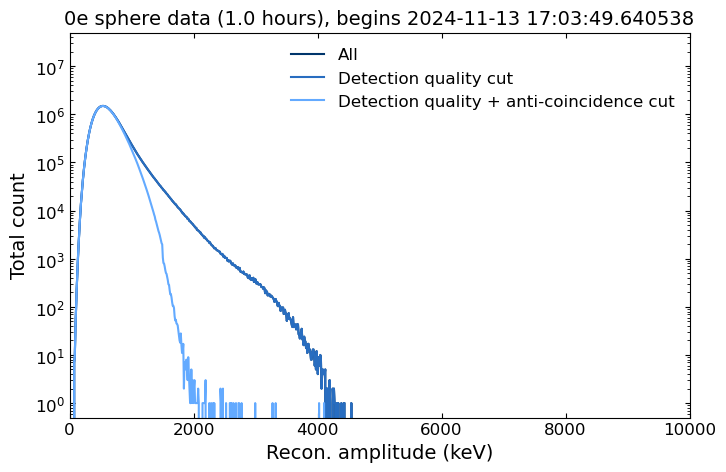

In [20]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_1, hh_all_sum_1, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_1, hh_cut_det_sum_1, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_1, hh_cut_all_sum_1, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'0e sphere data ({60/60:.1f} hours), begins {start_time}')

In [21]:
events_after_cut_1 = utils.get_events_after_cut(hhs_1, bc_1, good_dets_1, no_excess_events_1, thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_1))

Number of windows with large events (> 2000 keV):  45


/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_1.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_1.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_2.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_2.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_4.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_4.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_5.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_5.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_5.hdf5
/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_7.hdf5


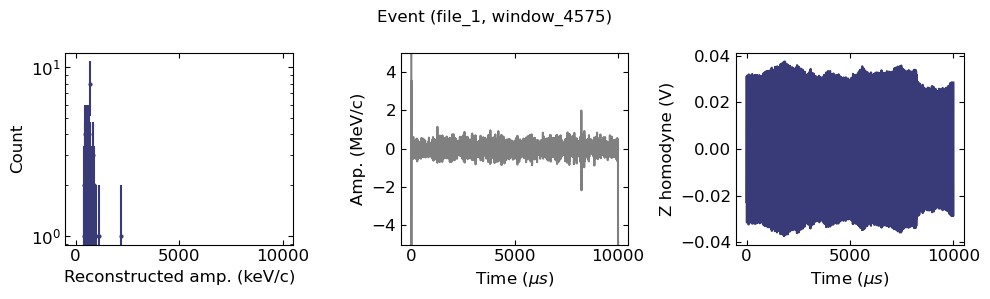

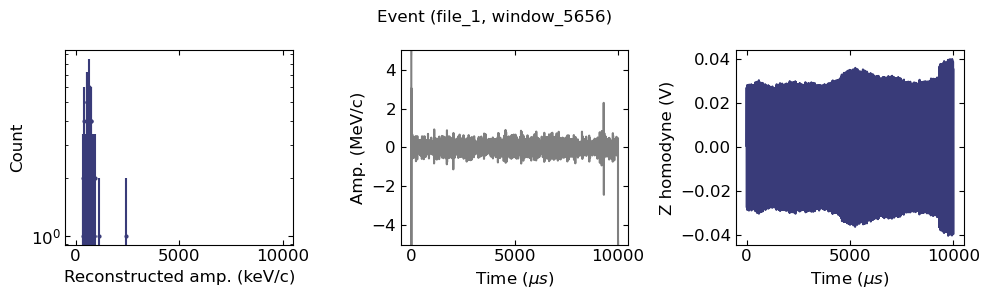

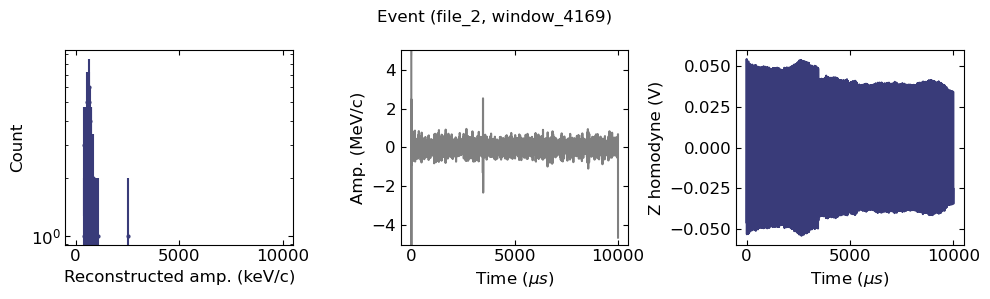

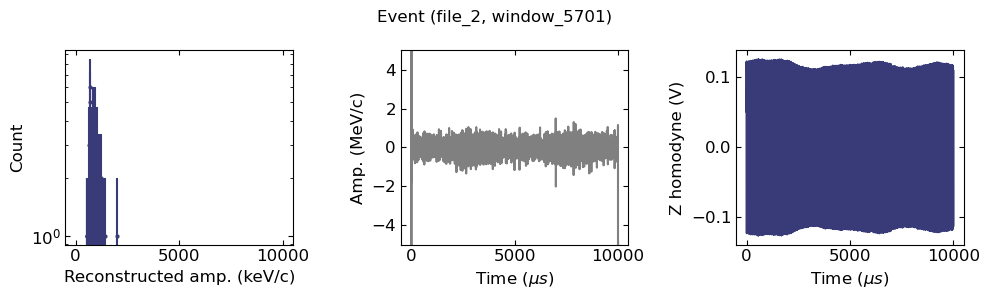

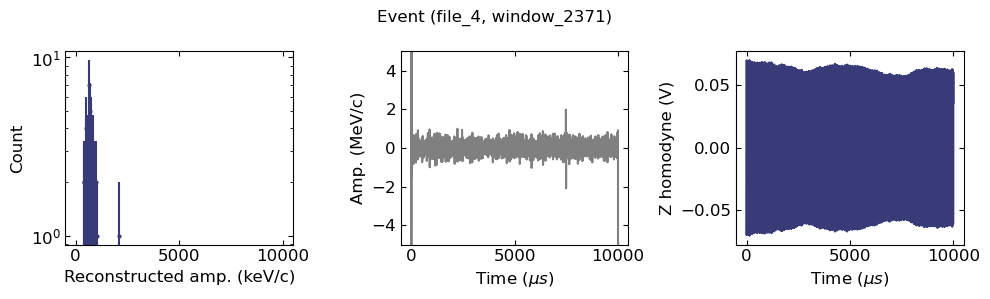

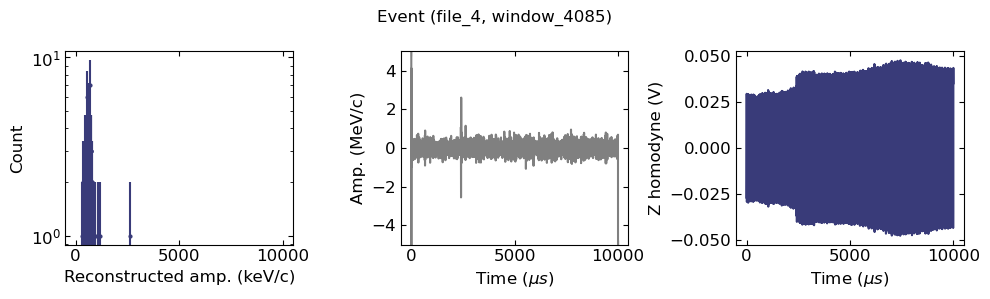

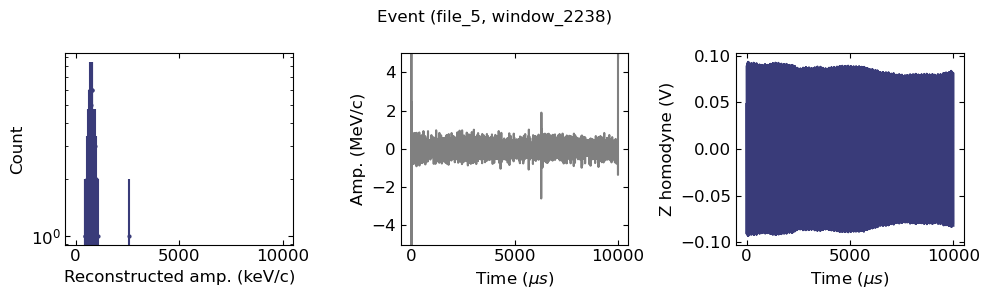

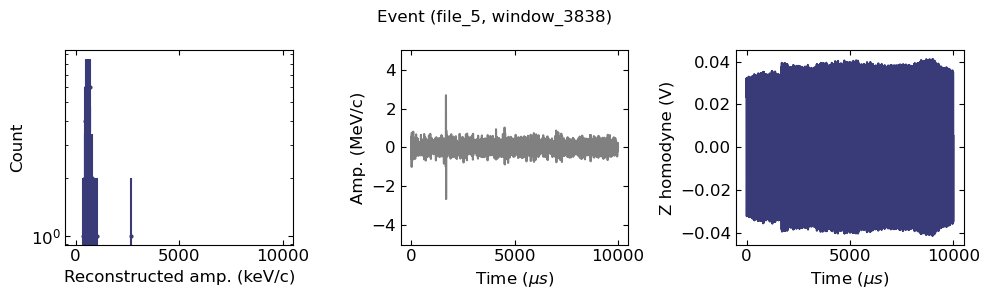

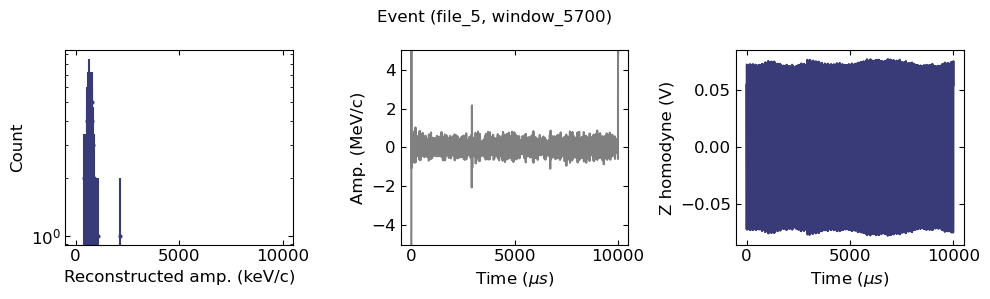

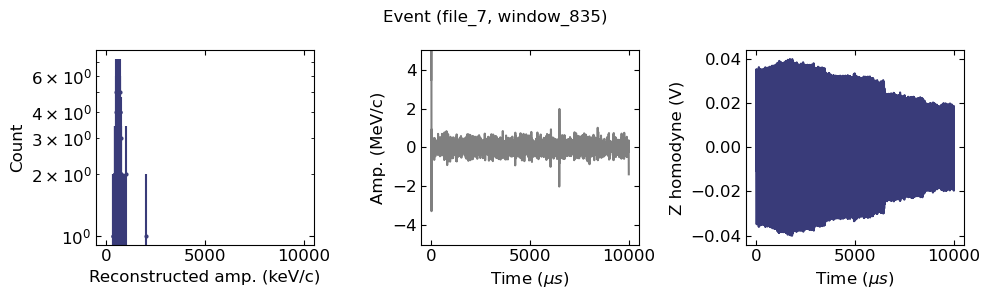

In [57]:
c_mv = 5.522e-08
amp2kev = 10990.988342067423

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_1[0:10]:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

/Volumes/LaCie/dm_data/20241113_0e_biased_negonly_3e-8mbar_1h/20241113_d_0e_biased_3e-8mbar_1.hdf5


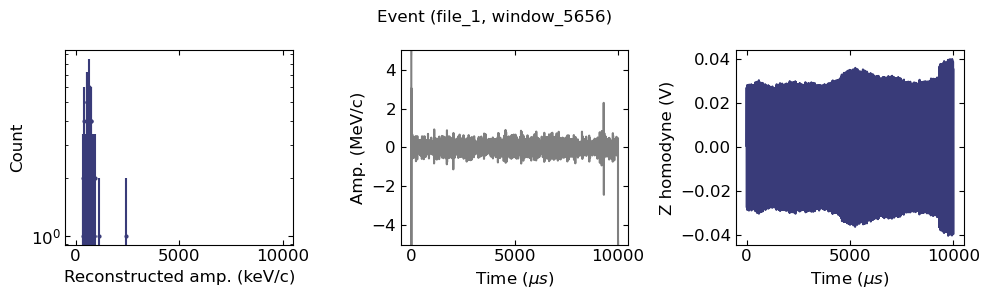

In [ ]:
i, j = 1, 5656
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

(4000.0, 4700.0)

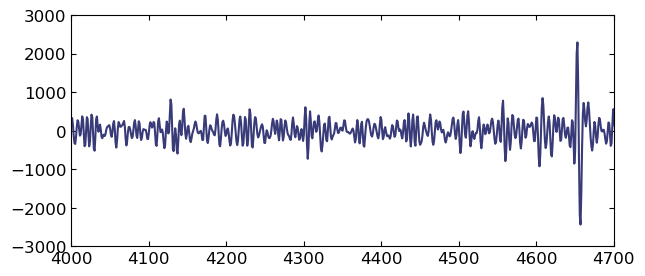

In [ ]:
plt.plot(amp_lp*amp2kev)
plt.ylim(-3000, 3000)
plt.xlim(4000, 4700)

Text(0.5, 1.0, 'NEG only (1 hour), after all cuts')

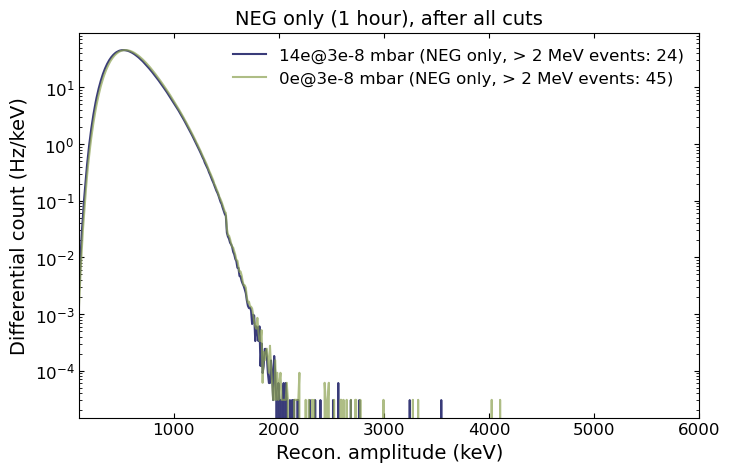

In [31]:
colors = plt.colormaps.get_cmap('tab20b').resampled(5).colors

n_search_per_win = (5000 - 150) / 25
time_per_search = 2e-6 * 25

plt.subplots(figsize=(8, 5))

plt.plot(bc_0, hh_cut_all_sum_0 / (hh_cut_all_0.shape[0] * n_search_per_win * time_per_search * (bc_0[1] - bc_0[0])), '-', label=f'14e@3e-8 mbar (NEG only, > 2 MeV events: {len(events_after_cut_0)})', alpha=1, color=colors[0])
plt.plot(bc_1, hh_cut_all_sum_1 / (hh_cut_all_1.shape[0] * n_search_per_win * time_per_search * (bc_1[1] - bc_1[0])), '-', label=f'0e@3e-8 mbar (NEG only, > 2 MeV events: {len(events_after_cut_1)})', alpha=0.7, color=colors[1])

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
# plt.xscale('log')
plt.xlim(100, 6000)
# plt.ylim(5e-7, 5e1)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Differential count (Hz/keV)')
plt.title(f'NEG only (1 hour), after all cuts')

## Noisy and windy data

In [49]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241114_0e_biased_negonly_noisy'
data_prefix = r'20241114_d_0e_biased_'

bc_2, hhs_2, good_dets_2, temps_2 = utils.load_histograms(data_dir, data_prefix, 1)
no_excess_events_2 = utils.check_excess_event(hhs_2, bc_2, thr=1500)

hh_all_sum_2 = np.sum(np.sum(hhs_2, axis=0), axis=0)
hh_cut_det_2 = hhs_2[good_dets_2]
hh_cut_all_2 = hhs_2[np.logical_and(good_dets_2, no_excess_events_2)]

hh_cut_det_sum_2 = np.sum(hh_cut_det_2, axis=0)
hh_cut_all_sum_2 = np.sum(hh_cut_all_2, axis=0)

Text(0.5, 1.0, 'Noisy 0e sphere data (1 minute), begins 2024-11-14 09:39:46.084091')

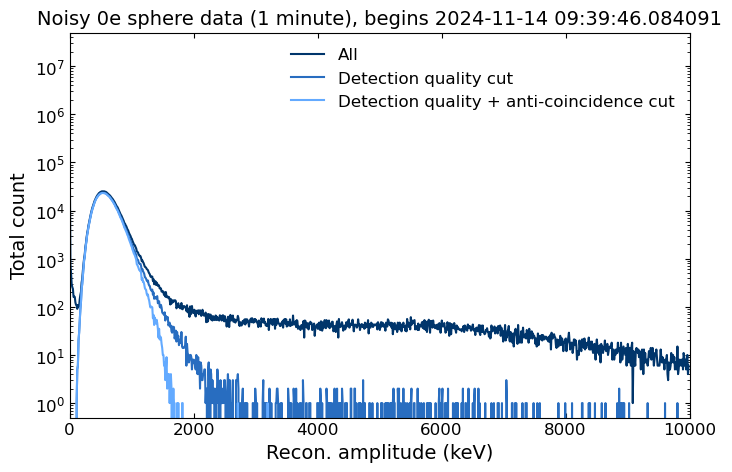

In [50]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_noisy_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_2, hh_all_sum_2, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_2, hh_cut_det_sum_2, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_2, hh_cut_all_sum_2, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Noisy 0e sphere data (1 minute), begins {start_time}')

In [54]:
events_after_cut_2 = utils.get_events_after_cut(hhs_2, bc_2, good_dets_2, np.ones_like(no_excess_events_2), thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_2))

Number of windows with large events (> 2000 keV):  70


/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5


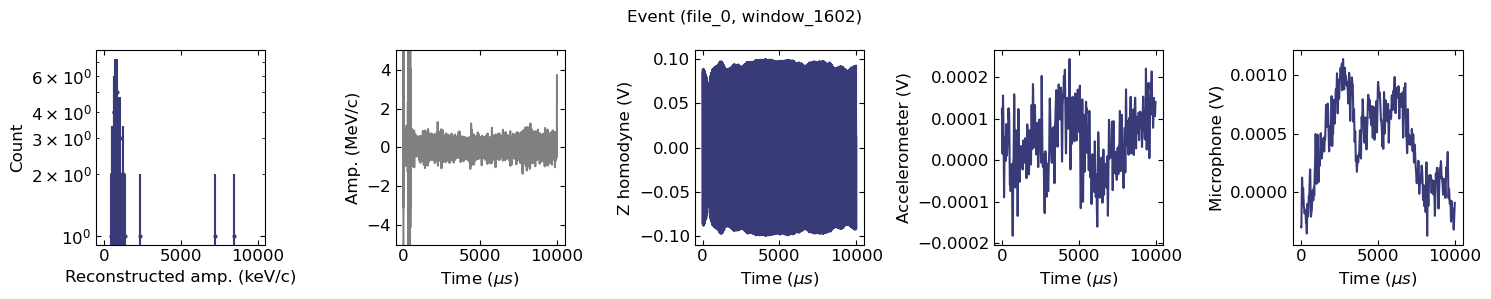

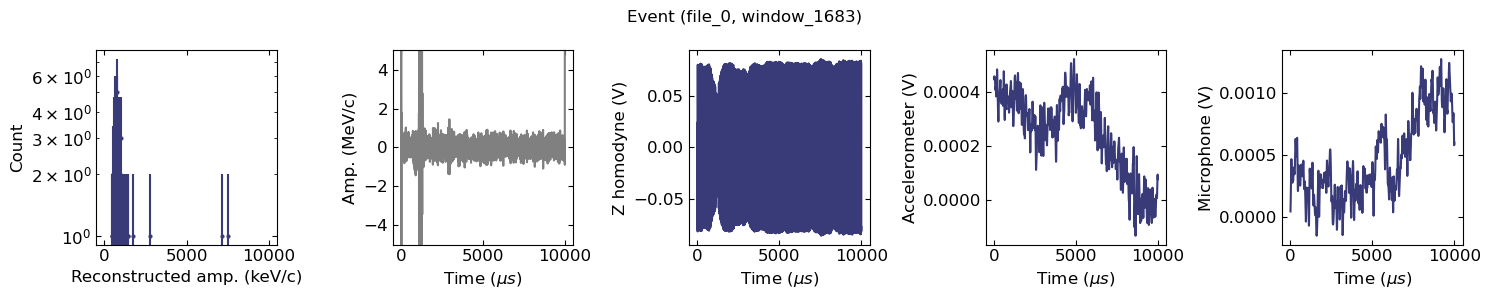

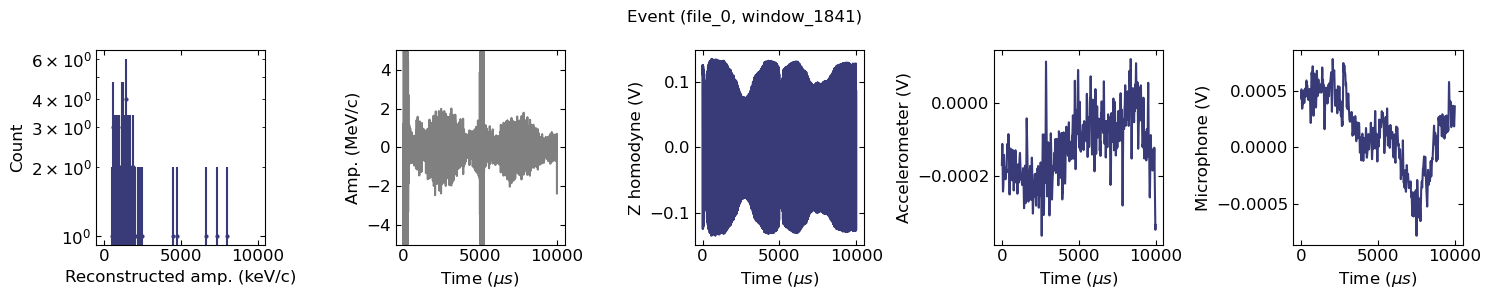

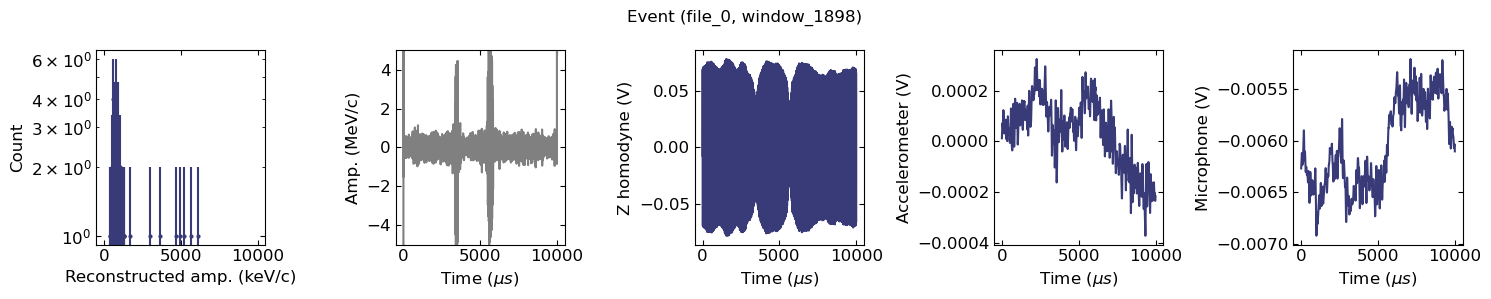

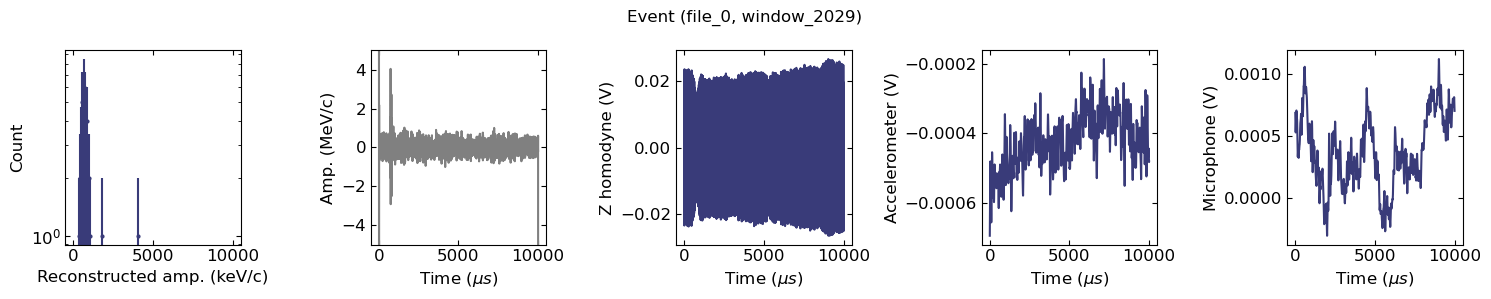

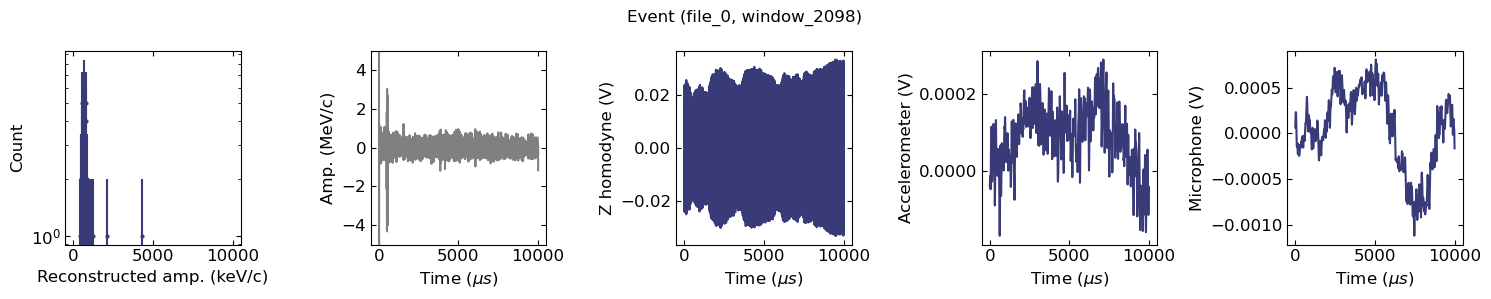

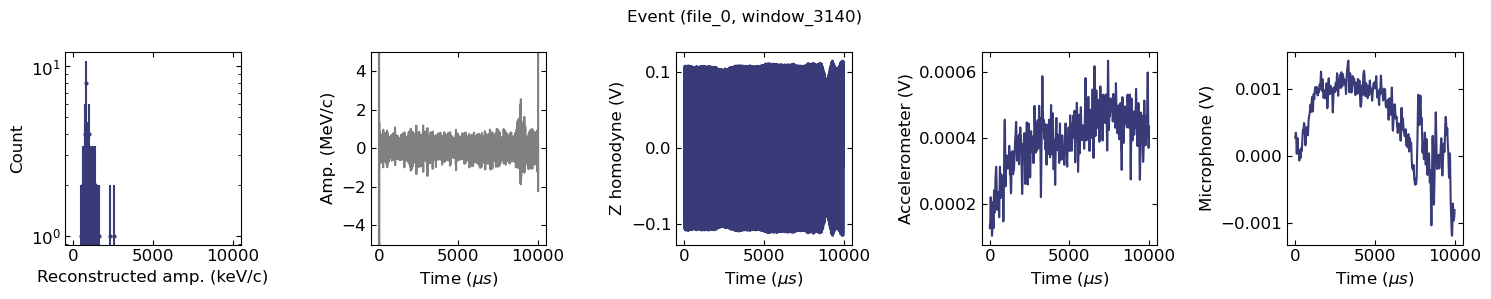

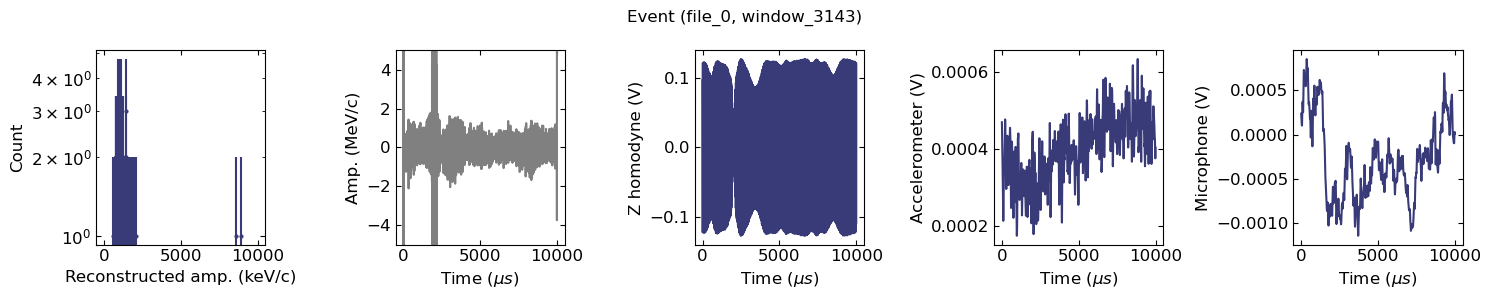

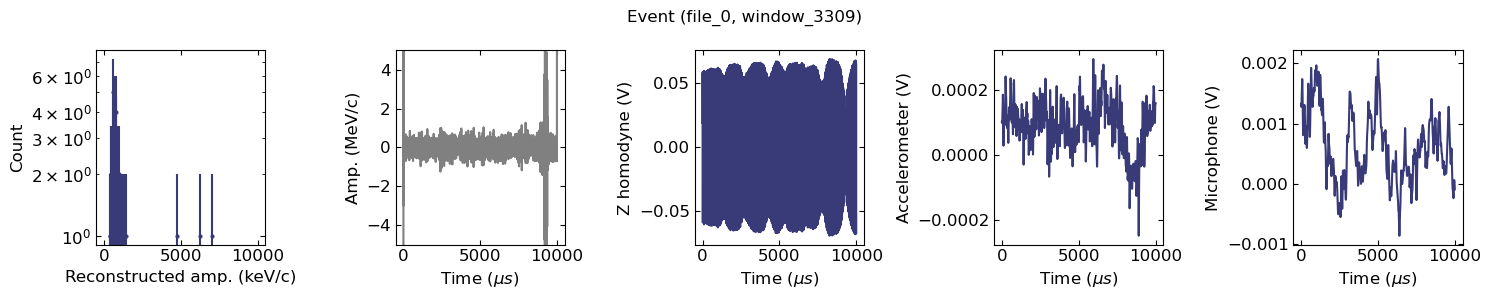

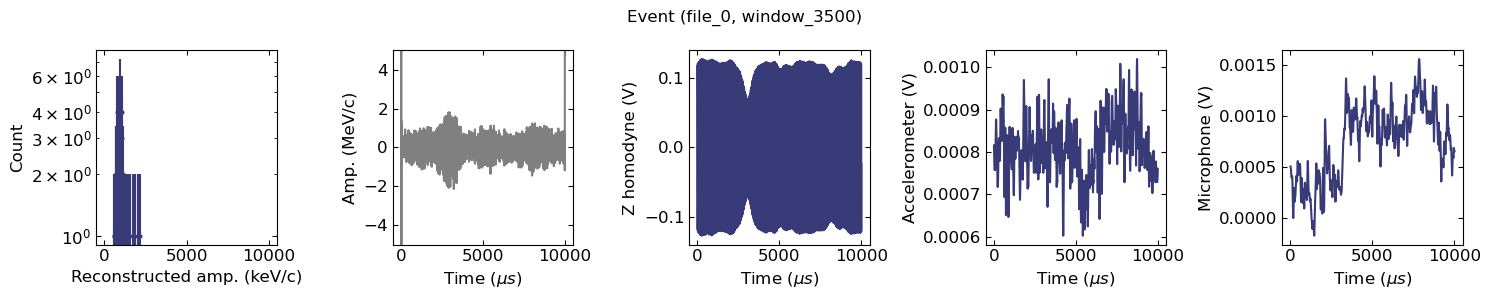

In [55]:
# data_dir = r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy'
# combined_path = os.path.join(data_dir, '*.hdf5')
# data_files = glob.glob(combined_path)
data_files = [r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy/20241114_d_0e_biased_0.hdf5']

for i, j in events_after_cut_2[10:20]:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev, True)

In [38]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241114_0e_biased_negonly_windy'
data_prefix = r'20241114_d_0e_biased_'

bc_3, hhs_3, good_dets_3, temps_3 = utils.load_histograms(data_dir, data_prefix, 1)
no_excess_events_3 = utils.check_excess_event(hhs_3, bc_3, thr=1500)

hh_all_sum_3 = np.sum(np.sum(hhs_3, axis=0), axis=0)
hh_cut_det_3 = hhs_3[good_dets_3]
hh_cut_all_3 = hhs_3[np.logical_and(good_dets_3, no_excess_events_3)]

hh_cut_det_sum_3 = np.sum(hh_cut_det_3, axis=0)
hh_cut_all_sum_3 = np.sum(hh_cut_all_3, axis=0)

Text(0.5, 1.0, 'Windy 0e sphere data (1 minute), begins 2024-11-14 09:45:18.279551')

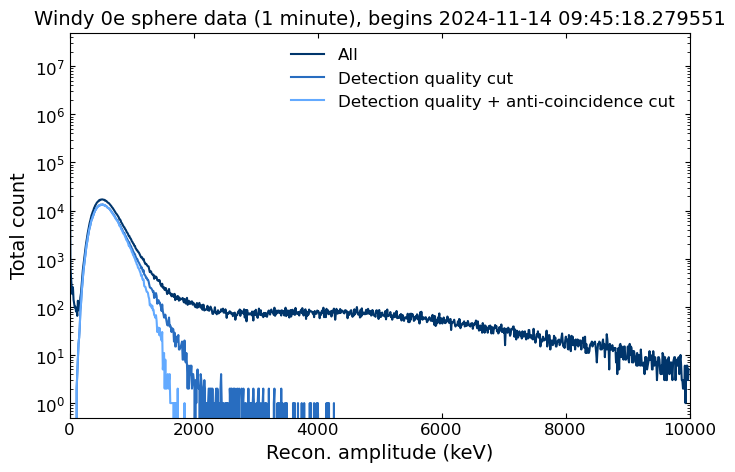

In [45]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_3, hh_all_sum_3, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_3, hh_cut_det_sum_3, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_3, hh_cut_all_sum_3, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Windy 0e sphere data (1 minute), begins {start_time}')

In [42]:
events_after_cut_3 = utils.get_events_after_cut(hhs_3, bc_3, good_dets_3, np.ones_like(no_excess_events_3), thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_3))

Number of windows with large events (> 2000 keV):  10


/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy/20241114_d_0e_biased_0.hdf5


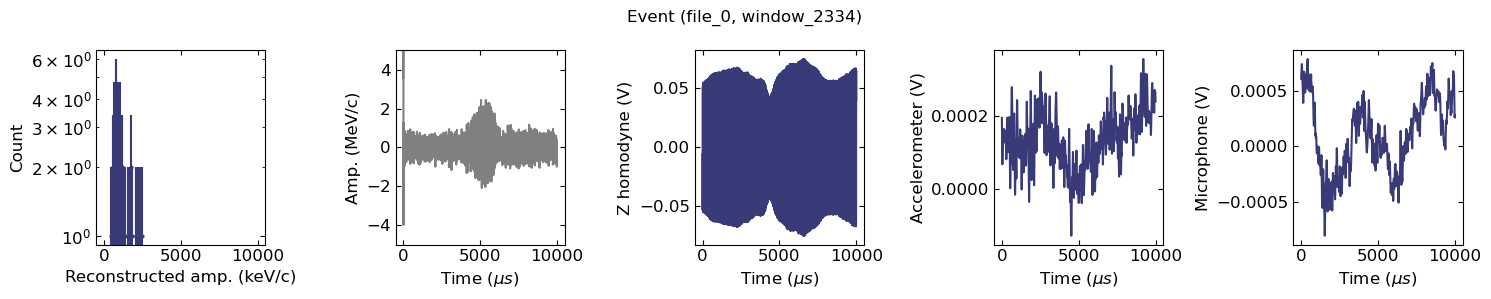

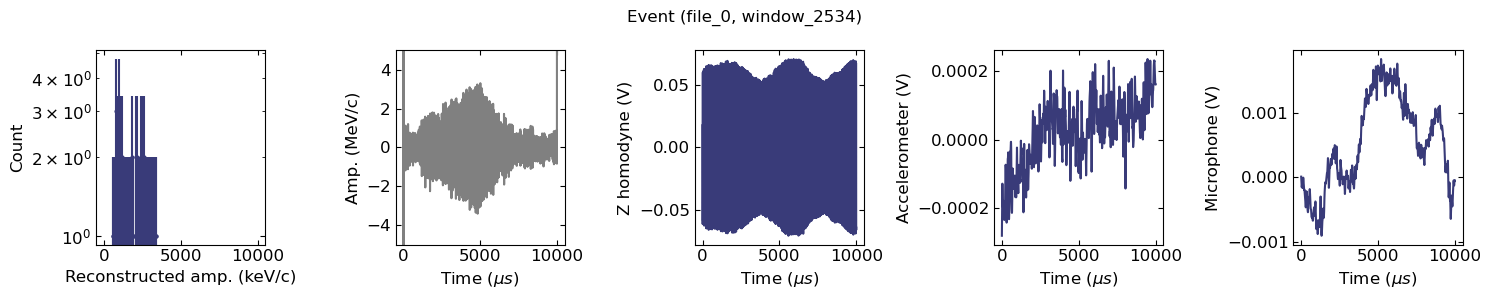

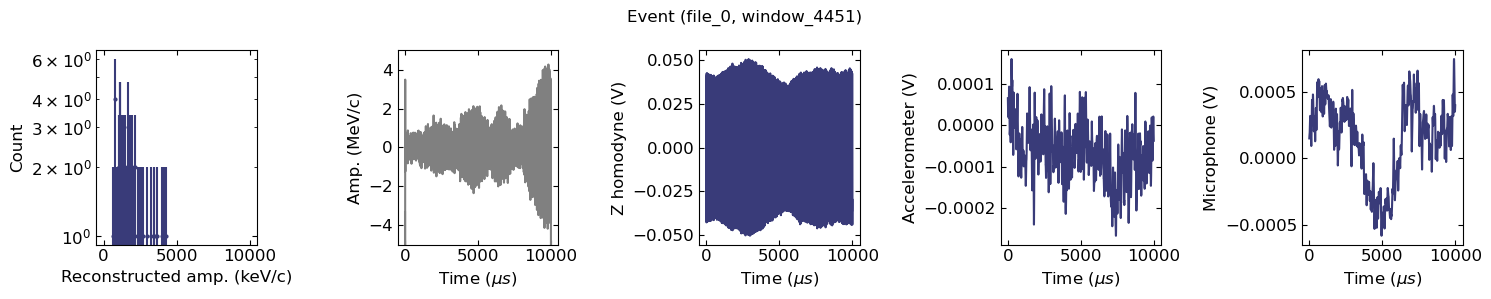

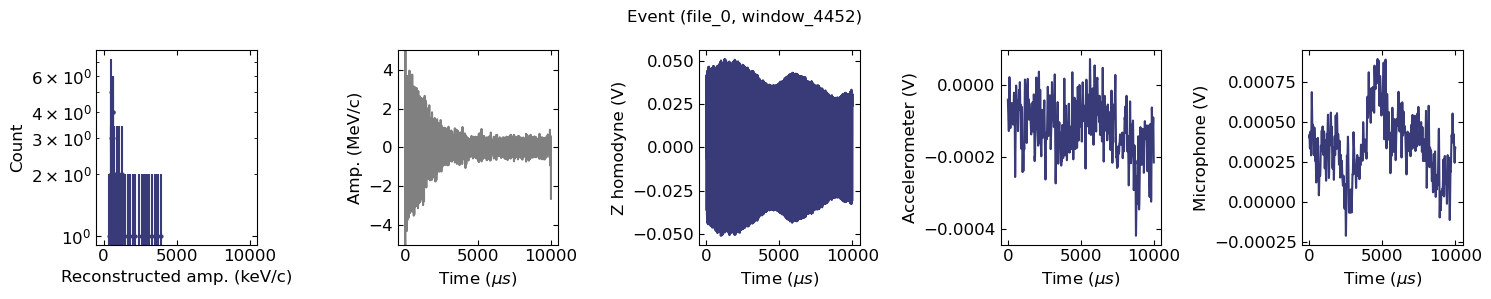

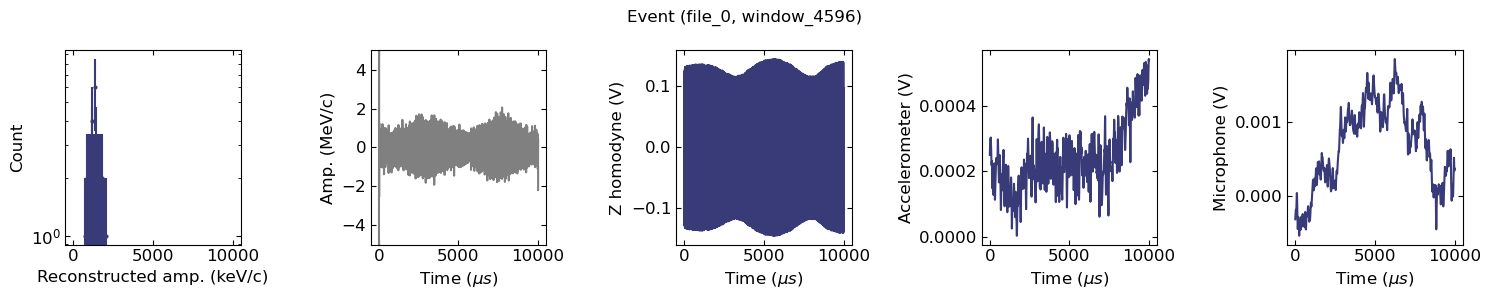

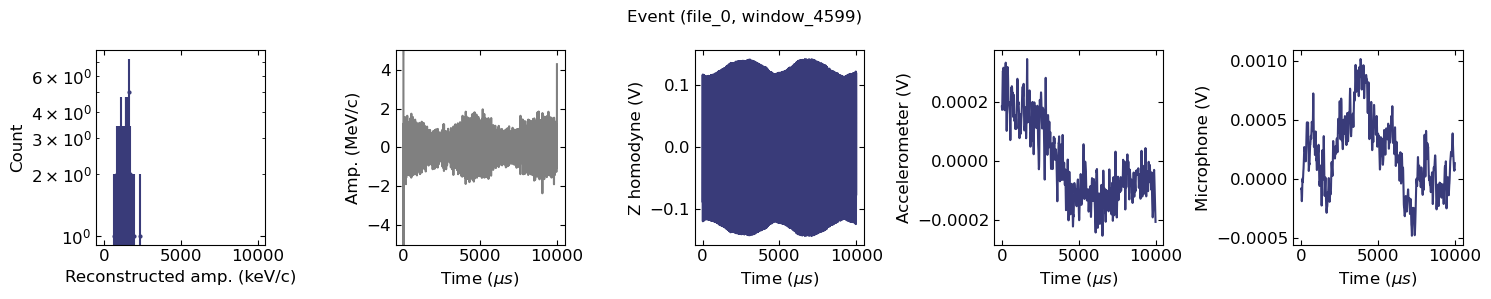

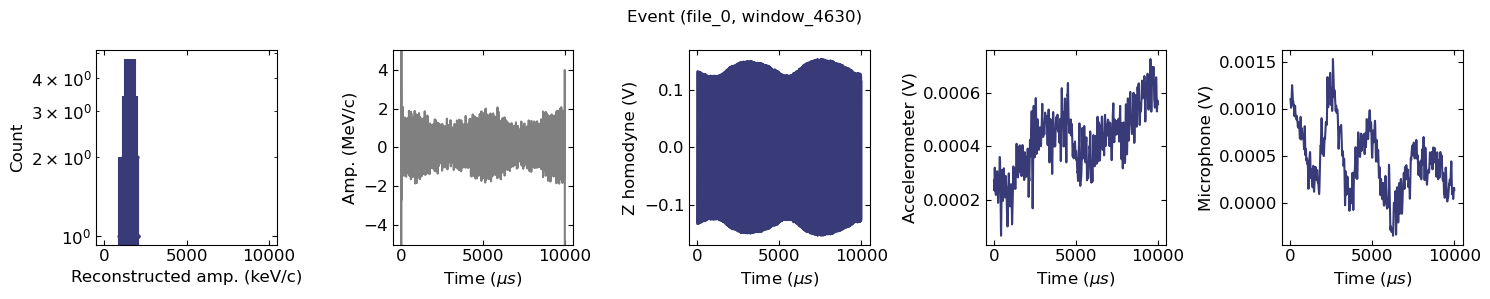

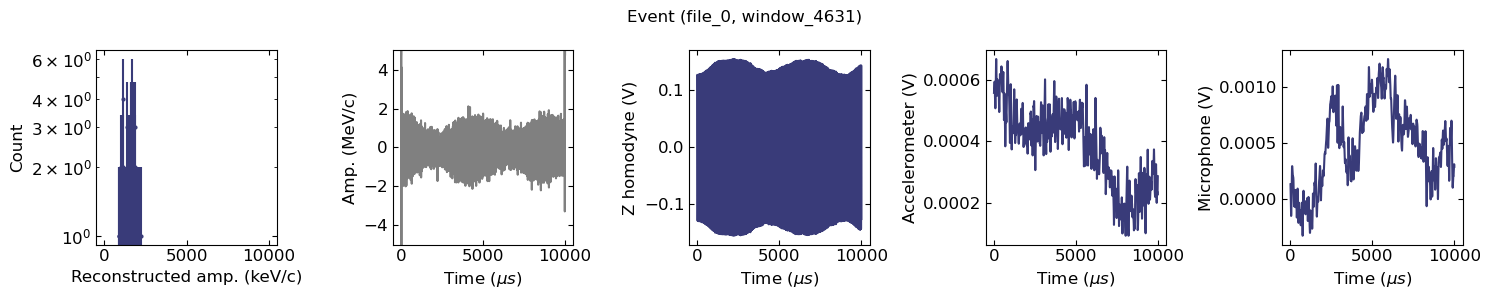

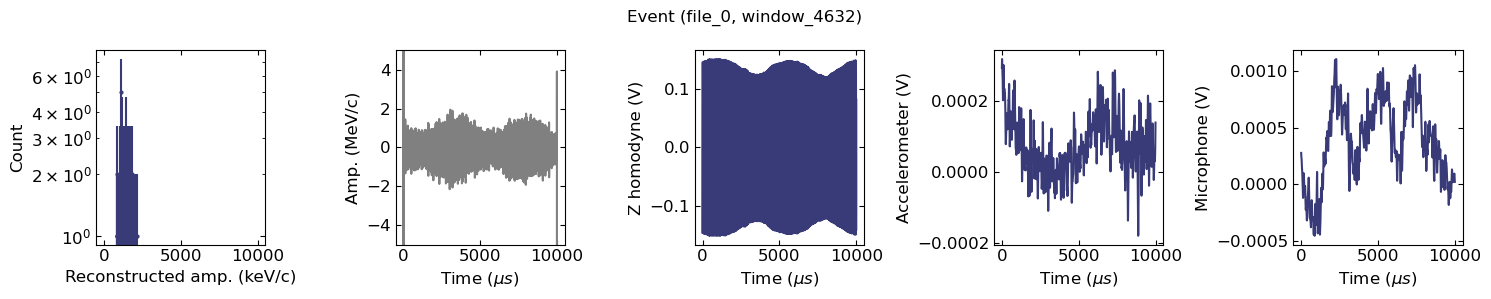

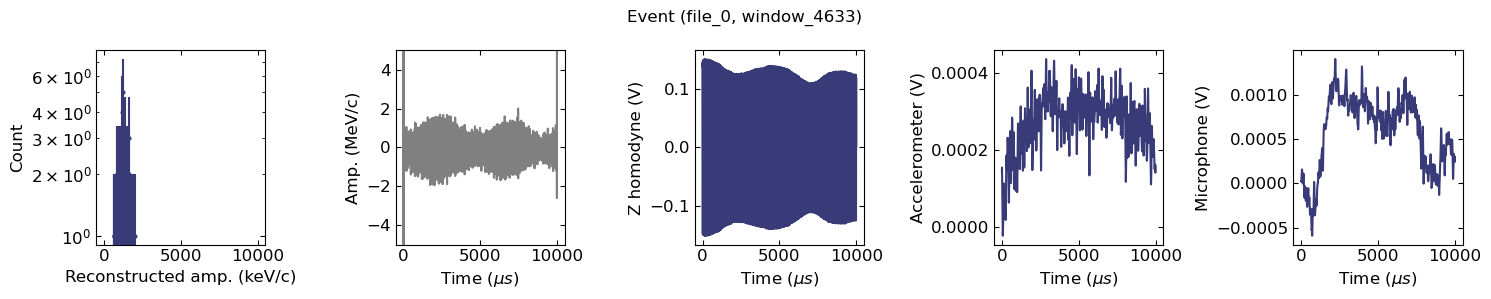

In [56]:
data_dir = r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_windy'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_3:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev, True)

In [12]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241114_0e_biased_negonly_noisy_1'
data_prefix = r'20241114_dfg_0e_biased_'

bc_5, hhs_5, good_dets_5, temps_5 = utils.load_histograms(data_dir, data_prefix, 5)
no_excess_events_5 = utils.check_excess_event(hhs_5, bc_5, thr=1500)

hh_all_sum_5 = np.sum(np.sum(hhs_5, axis=0), axis=0)
hh_cut_det_5 = hhs_5[good_dets_5]
hh_cut_all_5 = hhs_5[np.logical_and(good_dets_5, no_excess_events_5)]

hh_cut_det_sum_5 = np.sum(hh_cut_det_5, axis=0)
hh_cut_all_sum_5 = np.sum(hh_cut_all_5, axis=0)

Text(0.5, 1.0, 'Noisy 0e sphere data (1 minute), begins 2024-11-14 14:12:32.959957')

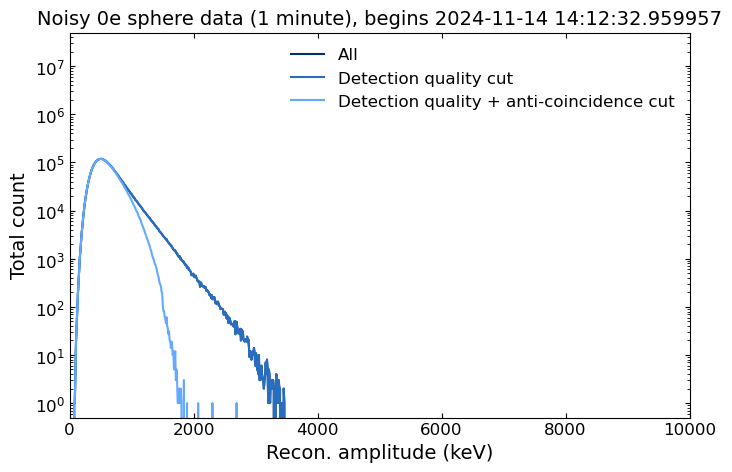

In [14]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy_1/20241114_dfg_0e_biased_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_5, hh_all_sum_5, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_5, hh_cut_det_sum_5, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_5, hh_cut_all_sum_5, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Noisy 0e sphere data (1 minute), begins {start_time}')

In [17]:
events_after_cut_5 = utils.get_events_after_cut(hhs_5, bc_5, good_dets_5, no_excess_events_5, thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_5))

Number of windows with large events (> 2000 keV):  3


/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy_1/20241114_dfg_0e_biased_2.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy_1/20241114_dfg_0e_biased_3.hdf5
/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy_1/20241114_dfg_0e_biased_4.hdf5


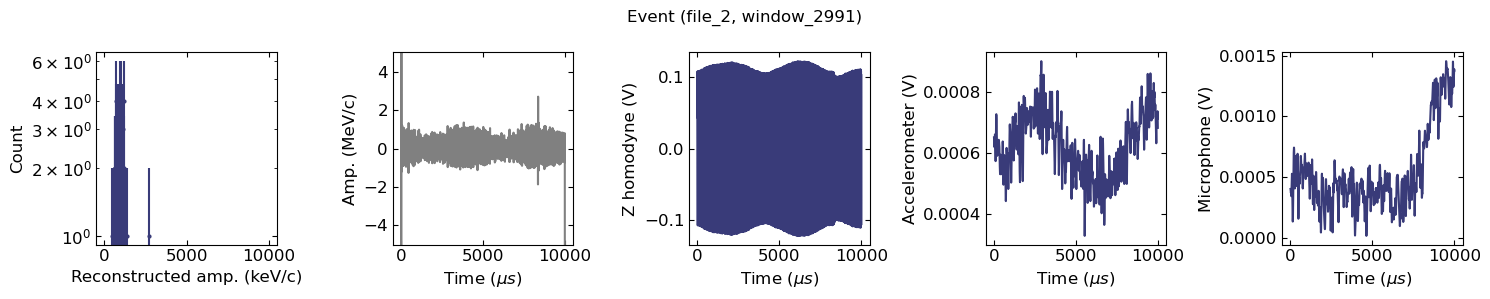

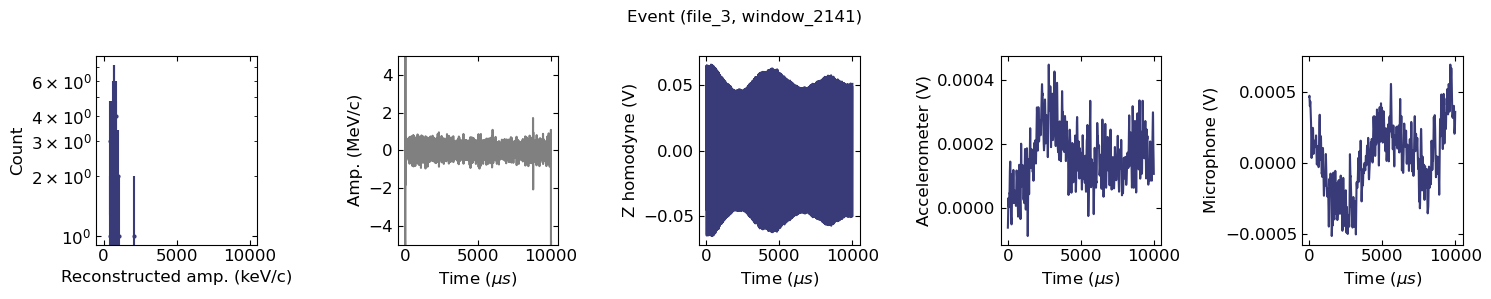

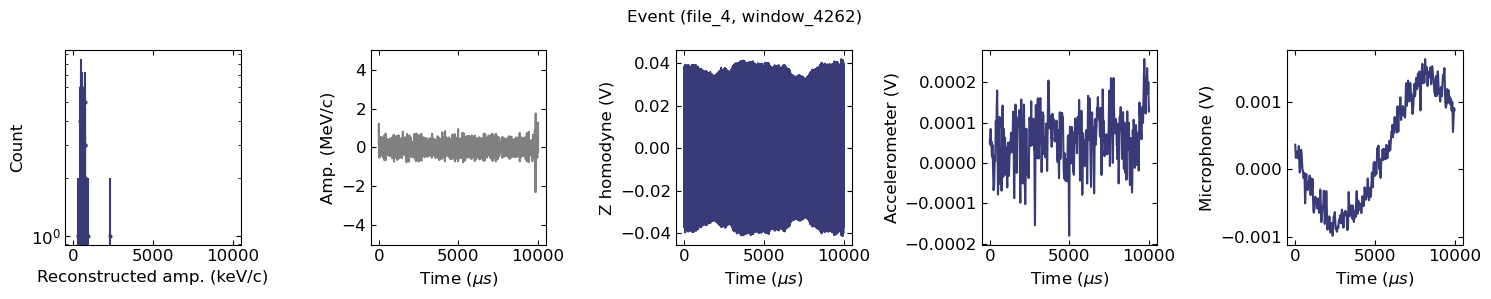

In [19]:
c_mv = 5.522e-08
amp2kev = 10990.988342067423

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241114_0e_biased_negonly_noisy_1'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_5:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev, True)

## Neutral, NEG only, large biased (-50 V)

In [4]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241114_0e_negonly_largebias'
data_prefix = r'20241114_dfg_0e_largebiased_'

bc_4, hhs_4, good_dets_4, temps_4 = utils.load_histograms(data_dir, data_prefix, 5)
no_excess_events_4 = utils.check_excess_event(hhs_4, bc_4, thr=1500)

hh_all_sum_4 = np.sum(np.sum(hhs_4, axis=0), axis=0)
hh_cut_det_4 = hhs_4[good_dets_4]
hh_cut_all_4 = hhs_4[np.logical_and(good_dets_4, no_excess_events_4)]

hh_cut_det_sum_4 = np.sum(hh_cut_det_4, axis=0)
hh_cut_all_sum_4 = np.sum(hh_cut_all_4, axis=0)

Text(0.5, 1.0, '0e sphere data (0.1 hours), begins 2024-11-14 16:54:41.266815')

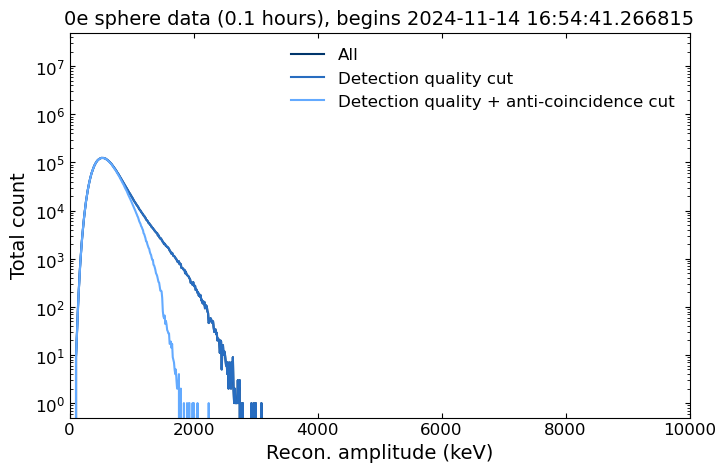

In [11]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241114_0e_negonly_largebias/20241114_dfg_0e_largebiased_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_4, hh_all_sum_4, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_4, hh_cut_det_sum_4, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_4, hh_cut_all_sum_4, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'0e sphere data ({5/60:.1f} hours), begins {start_time}')

In [7]:
events_after_cut_4 = utils.get_events_after_cut(hhs_4, bc_4, good_dets_4, no_excess_events_4, thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_4))

Number of windows with large events (> 2000 keV):  3


/Volumes/LaCie/dm_data/20241114_0e_negonly_largebias/20241114_dfg_0e_largebiased_0.hdf5
/Volumes/LaCie/dm_data/20241114_0e_negonly_largebias/20241114_dfg_0e_largebiased_2.hdf5
/Volumes/LaCie/dm_data/20241114_0e_negonly_largebias/20241114_dfg_0e_largebiased_4.hdf5


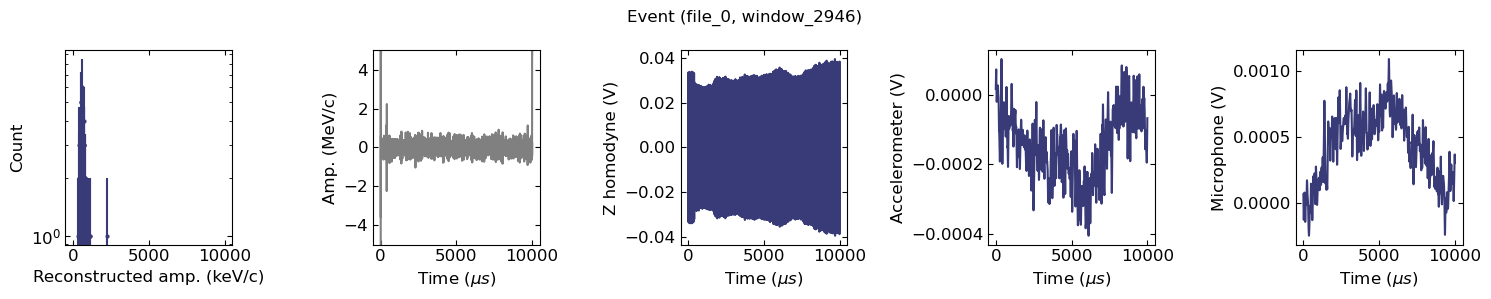

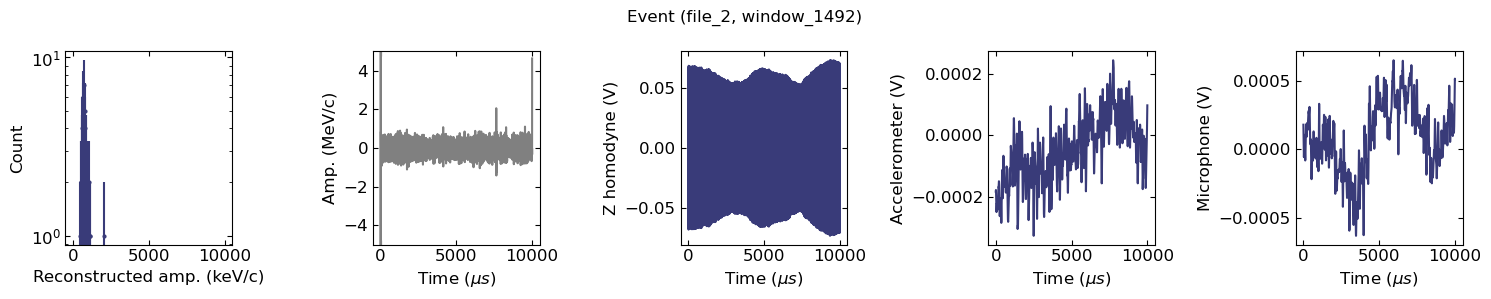

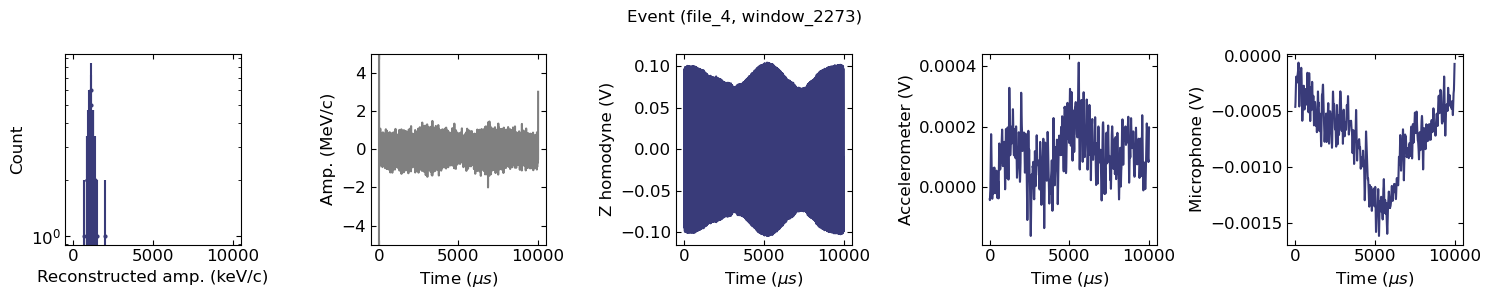

In [9]:
c_mv = 5.522e-08
amp2kev = 10990.988342067423

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241114_0e_negonly_largebias'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_4:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev, True)